Homework
Group: M80-107M-22
Student: Chernyshev Dmitry
Date: 19.12.2022

In [2]:
! pip install  ncon
# https://qudata.com/ml/ru/NN_Base_Numpy.html - numpy и тензоры - полезная ссылка

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from ncon import ncon
import time

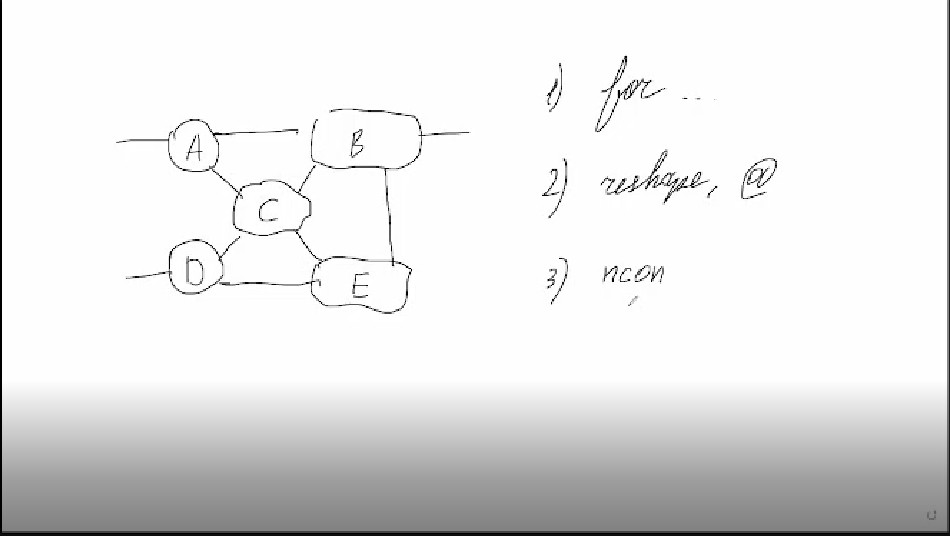

In [21]:
# инициализация тензоров
I1 = 10
j = 4

k1 = 5
k2 = 5
k3 = 5
k4 = 5

F1 = 16
l1 = 7
A1 = 14
m1 = 8

A = np.random.uniform(-1,1,(I1,j ,k1)) # тензор А (I,j,k1)
B = np.random.uniform(-1,1,(j ,F1,l1,k2)) # тензор B (j,F,l1,k2)

C = np.random.uniform(-1,1,(k1,k2,k3,k4)) # тензор C (k1,k2,k3,k4)

D = np.random.uniform(-1,1, (A1,k3,m1)) # тензор D (A1,k3,m1)
E = np.random.uniform(-1,1,(m1,k4,l1)) # тензор E (m1,k4,l1)


In [22]:
# проводим свертку
# ВАРИАНТ 1
# ncon ncon(L, v, order=None, forder=None, check_indices=True):
start_ncon = time.time()
result_ncon = ncon(
    (A, B, C, D, E), 
    (
        [-1, 5, 1], # тензор А (I,j,k1)
        [5, -2, 7, 2], # тензор B (j,F,l1,k2) 
        [1, 2, 3, 4], # тензор C (k1,k2,k3,k4) 
        [-3, 3, 6], # тензор D (A,k3,m1)
        [6, 4,7] # тензор E (m1,k4,l1)
     )
)
print(time.time() - start_ncon)
print(f'result_ncon.shape = {result_ncon.shape}')
print(result_ncon)

0.020900726318359375
result_ncon.shape = (10, 16, 14)
[[[ 19.58910234  -7.61531032  -1.90979628 ... -16.14888344   2.18928242
    25.09513217]
  [ -9.12630843 -10.30741944 -11.69662886 ...  16.67589196 -37.01962222
     3.29402121]
  [ 12.30997933 -22.60674495  14.20430105 ... -24.54324399 -22.19586534
    12.74256996]
  ...
  [ 33.1352071  -36.58263404  -3.10246803 ... -11.87530049   1.00925686
    15.2935469 ]
  [ -8.54299027  10.53181316 -31.35034616 ...  -5.50719653 -19.23296603
    18.3661609 ]
  [ 10.51214731  -5.77045956   3.1743839  ... -22.47607928  31.48582717
    14.30082125]]

 [[-11.72102122   9.54988664  -0.5711836  ...  -7.89794317 -25.84443156
    -2.16488238]
  [-30.5188455  -11.83628861 -12.84928622 ...  18.31943397 -20.75111001
   -29.01718123]
  [  4.30618395 -17.97888718  13.05851005 ...   9.73634731  -2.96769109
     3.98397665]
  ...
  [ 19.85367541 -35.64641461   6.14890725 ...  34.68203771 -15.76355896
    -9.40043036]
  [-43.79580537  -2.18528878  -3.64035297 

In [23]:
# ВАРИАНТ 2 
# np.tensordot np.tensordot(A, B, axes = (axes_A, axes_B))

start_tensordot  = time.time()
AC = np.tensordot(
    A,C, 
    axes=([-1],[0])
)
print(f'AC.shape = {AC.shape}')
ACB = np.tensordot(
    AC,B, 
    axes=([1,2],[0,-1])
)
print(f'ACB.shape = {ACB.shape}')
ACBE = np.tensordot(
    ACB,E, 
    axes=([1,-1],[-2,-1])
)
print(f'ACBE.shape = {ACBE.shape}')

result_Tensordot = np.tensordot(
    ACBE,D, 
    axes=([-3,-1],[-2,-1])
)

print(time.time() - start_tensordot,'\n')
print(f'result_Tensordot.shape = {result_Tensordot.shape}')
print(f'result_Tensordot = {result_Tensordot}')

AC.shape = (10, 4, 5, 5, 5)
ACB.shape = (10, 5, 5, 16, 7)
ACBE.shape = (10, 5, 16, 8)
0.004675865173339844 

result_Tensordot.shape = (10, 16, 14)
result_Tensordot = [[[ 19.04345193  11.39454675   1.44715437 ... -29.36199499  10.20777052
     8.24254865]
  [ -6.50548088 -29.88596002  -0.348106   ...  48.77552604  30.44870402
   -40.36933765]
  [ -8.85774309  47.7811488  -10.19950633 ...   7.65142411  27.19905571
   -11.44451496]
  ...
  [ 36.19616456  10.40314963   0.31010603 ... -36.18996766  21.87684437
    23.2749267 ]
  [ 12.52084803   7.11567897  -1.57160141 ...  15.300998    -8.89718716
   -34.40467317]
  [ -1.00612212  23.92015314   1.80422669 ...   3.18241735 -10.5619445
    13.83302473]]

 [[-16.96026104   8.81811632 -16.73356237 ... -11.15867071  13.01134799
    -1.57777297]
  [-35.74523144  -4.5323947  -20.38204084 ... -10.0422784  -12.34453627
   -42.15695469]
  [ -9.73126281  16.08637307   1.57291724 ... -20.94955687  17.76306539
    12.68449483]
  ...
  [ 13.95672726  14.

In [24]:
# ВАРИАНТ 3 
start_FOR  = time.time()
AC = np.zeros((I1,j ,k2,k3,k4))
for i_1 in range(I1):
  for J_0 in range(j):
    for K_2 in range(k2):
      for K_3 in range(k3):
        for K_4 in range(k4):
          #sum 
          for sumIter in range(k1): 
            #print(sumIter)
            AC[i_1,J_0 ,K_2,K_3,K_4] = AC[i_1,J_0 ,K_2,K_3,K_4] +  A[i_1][J_0][sumIter] * C[sumIter][K_2][K_3][K_4]
print(f"AC.shape = {AC.shape}")

ACB = np.zeros((I1,k3,k4,F1,l1))
for i_1 in range(I1):
  for K_3 in range(k3):
    for K_4 in range(k4):
      for f_1 in range(F1):
        for L_1 in range(l1):
          #sum
          for sumIter1 in range(j):
            for sumIter2 in range(k2):  
                ACB[i_1,K_3,K_4,f_1,L_1] = ACB[i_1,K_3,K_4,f_1,L_1] + AC[i_1,sumIter1,sumIter2,K_3,K_4] * B[sumIter1 ,f_1,L_1,sumIter2]

print(f"ACB.shape = {ACB.shape}")
ACBE = np.zeros((I1,k4,F1,m1)) #= (10, 5, 16, 8)
for i_1 in range(I1):
    for K_4 in range(k4):
      for f_1 in range(F1):
        for M_1 in range(m1):
          #sum
          for sumIter1 in range(k3):
            for sumIter2 in range(l1): 
              ACBE[i_1,K_4,f_1,M_1] =ACBE[i_1,K_4,f_1,M_1]+ ACB[i_1,sumIter1,K_4,f_1,sumIter2] * E[M_1,K_4,sumIter2]

print(f"ACBE.shape = {ACBE.shape}")
result_For  = np.zeros((I1,F1,A1))
for i_1 in range(I1):
  for f_1 in range(F1):
    for a_1 in range(A1):
      #sum
      for sumIter1 in range(k4):
        for sumIter2 in range(m1): 
          result_For[i_1,f_1,a_1] = result_For[i_1,f_1,a_1] + ACBE[i_1,sumIter1,f_1,sumIter2] * D[a_1,sumIter1,sumIter2]

print(f"result_For.shape = {result_For.shape}")
print(time.time() - start_FOR,'\n')


print(f"result_For = {result_For}")

AC.shape = (10, 4, 5, 5, 5)
ACB.shape = (10, 5, 5, 16, 7)
ACBE.shape = (10, 5, 16, 8)
result_For.shape = (10, 16, 14)
2.037170648574829 

result_For = [[[ 26.82330581 -15.11989959 -11.99973344 ... -38.44524284  -0.55977311
     7.01953983]
  [  4.93178696   8.67943657  -5.75713097 ...  11.03613609  16.0648764
     6.06915222]
  [ 34.76685903 -35.14275529  16.20492034 ... -32.95692806  37.04339497
    13.22827054]
  ...
  [ -2.46143896  12.23242541 -44.17682586 ... -22.67051822  15.82116114
    20.07014819]
  [ 20.87986878  -6.14955605  -8.63360942 ...  -4.27174395  14.20360671
     7.38677788]
  [ -0.67157515  -1.09247409  14.48198908 ...  -4.21049921  -9.45319982
    -4.21317161]]

 [[  5.40718011  12.78097497  -9.58330275 ...   8.28515045   1.45739073
   -16.88751091]
  [-14.88448374  -2.77340488  12.05563029 ...  -5.0416717    7.10310178
    -9.18305721]
  [ 10.70813112 -12.5864885   30.35828588 ...  -4.99362378  15.69047413
     3.81942831]
  ...
  [-40.10311034  13.30435383 -29.01

Из всего можно сделать выводы:
* Самый практичный способ - ncon;
* Самый затратный через -  цикл for